In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [3]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

### Understanding the Hypothesis Testing

**Step - 1:**
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

**Step - 2:**  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

**Step - 3:**
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

**Step - 4:**
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

**Step - 5.1: Apply decision rule:**
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

**Step - 5.2: Compute p-value** $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

## Q-1:
### Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq 500  $$
Null Hypothesis (Status Quo): $$ H_0: \mu = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}  \: for\: Known \:variance   $$ 
                        $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} \:for \:unknown \:variance $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: 
<p>

 $$ ?\: tailed\: z-test\::  reject \ H_0 \ if \ ? $$

<p/>
<p>

 $$ ? \:tailed \:t-test\:: reject \ H_0 \ if \ ? $$ 
 
<p/>

Step - 5.2: Compute p-value for z-test and p-test


#### *Known variance of population:*

In [4]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] #Sample size n=10

sum(l)/len(l) #Smaple mean

465.3

In [5]:
# Two Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [6]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = 50

In [7]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.1946206961568544


Text(465.3, 0.0007, 'x_bar')

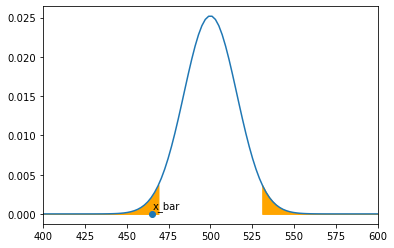

In [8]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


#### In this case sample mean falls in the rejection region
#### i.e. here we reject the Null Hypothesis

In [9]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [10]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.028190817687629988
Reject Null Hypothesis


#### *Unknown variance of population:*

In [11]:
randomsample = [504, 573, 570, 598, 426, 418, 452, 597, 567, 404, 
                448, 566, 453, 442, 454, 529, 475, 508, 464, 406] #Sample size n=20
print(randomsample)

[504, 573, 570, 598, 426, 418, 452, 597, 567, 404, 448, 566, 453, 442, 454, 529, 475, 508, 464, 406]


In [12]:
s_mean=sum(randomsample)/len(randomsample)
print(s_mean)

492.7


In [13]:
import statistics as stat
print(" the sample standard deviation    S={}".format(stat.stdev(randomsample))) #Sample Standard Deviation

 the sample standard deviation    S=66.01921570350001


In [14]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 492.7
pop_mean = 500
sample_std = 66.01

In [15]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [16]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 19)

print(t_critical)

2.093024054408263


In [17]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-0.4945704055672925


Text(492.7, 0.0007, 'x_bar')

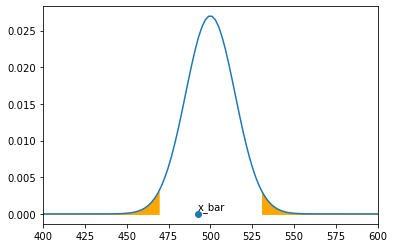

In [18]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

#### In this case sample mean not falls in the rejection region
#### i.e. here we can't reject the Null Hypothesis

In [19]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [20]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6209033967349091
Fail to reject Null Hypothesis


## Q-2:
### You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu > 4  $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq 4 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$


Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}  \: for\: Known \:variance   $$ 
                        $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} \:for \:unknown \:variance $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: 
<p>

$$ ?\: tailed\: z-test\::  reject \ H_0 \ if \ ? $$

<p/>
<p>

 $$ ? \:tailed \:t-test\:: reject \ H_0 \ if \ ? $$
 
<p/>

Step - 5.2: Compute p-value for z-test and p-test



#### *Known variance of population:*

In [21]:

# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha2 = 1 - confidence_level

z_critical2 = norm.ppf(1 - alpha2)

print(z_critical2)

1.6448536269514722


In [22]:
import random

sample2 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] #Sample size n=20
print(sample2)

[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]


In [23]:
s_mean2=sum(sample2)/len(sample2)
print(s_mean2)

4.25


In [24]:
# Defining the sample and population parameters

sample_size2 = 20
sample_mean2 = 4.25
pop_mean2 = 4
pop_std2 = 0.5

In [25]:
# Calculating the z-score

z2 = z_score(sample_size2, sample_mean2, pop_mean2, pop_std2)

print(z2)

2.23606797749979


Text(4.25, 0.1, 'x_bar')

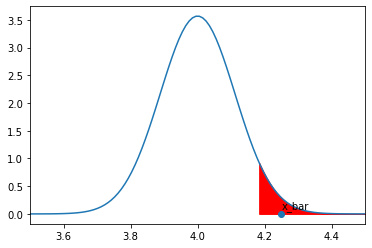

In [26]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean2
std = pop_std2 / (sample_size2**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_right2 = pop_mean2 + (z_critical2 * std)


# Shading the right rejection region
x1 = np.linspace(z_critical_right2, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean2, 0)
plt.annotate("x_bar", (sample_mean2, 0.1))



- **In this case sample mean falls in the rejection region**
- **i.e. Reject the Null Hypothesis**

In [27]:
# Conclusion using z test

if(np.abs(z2) > z_critical2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [28]:
# Conclusion using p test

p_value2 = 1.0 - norm.cdf(np.abs(z2))

print("p_value = ", p_value2)

if(p_value2 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0126736593387341
Reject Null Hypothesis


#### *Unknown variance of population:*

In [29]:
import statistics as stat
print(" the sample standard deviation    S={}".format(stat.stdev(sample2))) #Sample Standard Deviation

 the sample standard deviation    S=0.8506963092234007


In [30]:
# Defining the sample and population parameters

sample_size2 = 20
sample_mean2 = 4.25
pop_mean2 = 4
sample_std2 = 0.85

In [31]:
# One tail
from scipy.stats import t
alpha2 = 1 - 0.95

t_critical2 = t.ppf(1-alpha2, df = 19)

print(t_critical2)

1.729132811521367


In [32]:
# Two tail

alpha2 = 1 - 0.95

t_critical2 = t.ppf(1-alpha2/2, df = 19)

print(t_critical2)

2.093024054408263


In [33]:
# Calculating the t-score

t2 = t_score(sample_size2, sample_mean2, pop_mean2, sample_std2)

print(t2)

1.3153341044116411


Text(4.25, 0.0007, 'x_bar')

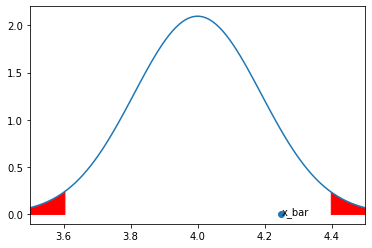

In [34]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean2
std = sample_std2 / sample_size2**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left2 = pop_mean2 + (-t_critical2 * std)
t_critical_right2 = pop_mean2 + (t_critical2 * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left2, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right2, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean2, 0)
plt.annotate("x_bar", (sample_mean2, 0.0007))

#### In this case sample mean not falls in the rejection region
#### i.e. here we can't reject the Null Hypothesis

In [35]:
# Conclusion using t test

if(np.abs(t2) > t_critical2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [36]:
# Conclusion using p test

p_value2 = 2 * (1.0 - norm.cdf(np.abs(t2)))

print("p_value = ", p_value2)

if(p_value2 < alpha2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18839764108331547
Fail to reject Null Hypothesis


## Q-3: 
### TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu >15  $$
Null Hypothesis (Status Quo): $$ H_0: mu \leq 15  $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$


Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}  \: for\: Known \:variance   $$ 
                        $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} \:for \:unknown \:variance $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: 
<p> 

$$ ?\: tailed\: z-test\::  reject \ H_0 \ if \ ? $$ 

<p/>

<p>

$$ ? \:tailed \:t-test\:: reject \ H_0 \ if \ ? $$ 

<p/>

Step - 5.2: Compute p-value for z-test and p-test



#### *Known variance of population:*

In [37]:
l3=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
s_mean3=sum(l3)/len(l3)
s_mean3

15.098999999999998

In [38]:
# Defining the sample and population parameters

sample_size3 = 20
sample_mean3= 15.098
pop_mean3 = 15
pop_std3 = 1

In [39]:
# One Tail

confidence_level = 0.95

alpha3 = 1 - confidence_level

z_critical3 = norm.ppf(1 - alpha3)

print(z_critical3)

1.6448536269514722


In [40]:
z3 = z_score(sample_size3, sample_mean3, pop_mean3, pop_std3)

print(z3)

0.4382693235899622


Text(15.098, 0.1, 'x_bar')

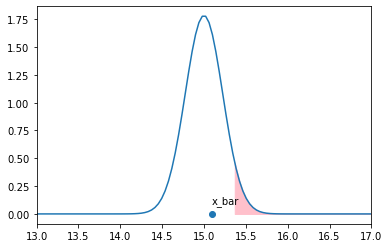

In [41]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min3 = 13
x_max3 = 17

# Defining the sampling distribution mean and sampling distribution std
mean3 = pop_mean3
std3 = pop_std3 / (sample_size3**0.5)


# Ploting the graph and setting the x limits
x3 = np.linspace(x_min3, x_max3, 100)
y3 = norm.pdf(x3, mean3, std3)

plt.xlim(x_min3, x_max3)


plt.plot(x3, y3)

# Computing the right critical values (one tailed Test)
z_critical_right3 = pop_mean3 + (z_critical3 * std3)

# Shading the right rejection region
x13 = np.linspace(z_critical_right3, x_max3, 100)
y13 = norm.pdf(x13, mean3, std3)
plt.fill_between(x13, y13, color='pink')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean3, 0)
plt.annotate("x_bar", (sample_mean3, 0.1))


- **In this case sample mean falls in the acceptance region**
- **i.e. Fail to Reject the Null Hypothesis**

In [42]:
if(np.abs(z3) > z_critical3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [43]:
p_value3 = 1.0 - norm.cdf(np.abs(z3))

print("p_value = ", p_value3)

if(p_value3 < alpha3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3305955303362321
Fail to reject Null Hypothesis


#### Unnown variance of population:

In [44]:
import statistics as stat
print(" the sample standard deviation    S={}".format(stat.stdev(l3))) #Sample Standard Deviation

 the sample standard deviation    S=1.0253671999517258


In [45]:
# Defining the sample and population parameters

sample_size3 = 20
sample_mean3= 15.098
pop_mean3 = 15
sample_std3 = 1.025

In [46]:
#  right One tail (calculating t-critical)
from scipy.stats import t
alpha3 = 1 - 0.95

t_critical3= t.ppf(1-alpha3, df = 19)

print(t_critical3)

1.729132811521367


In [47]:
# Calculating the t-score

t3= t_score(sample_size3, sample_mean3, pop_mean3, sample_std3)

print(t3)

0.42757982789264604


Text(15.098, 0.1, 'x_bar')

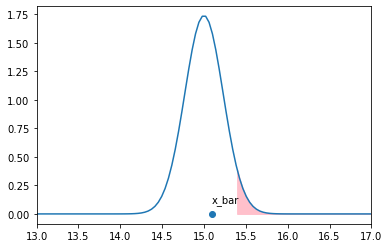

In [48]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min3 = 13
x_max3 = 17


# Defining the sampling distribution mean and sampling distribution std
mean31 = pop_mean3
std31 = sample_std3 / (sample_size3**0.5)


# Ploting the graph and setting the x limits
x31 = np.linspace(x_min3, x_max3, 100)
y31 = norm.pdf(x31, mean31, std31)
plt.xlim(x_min3, x_max3)
plt.plot(x31, y31)


# Computing the right critical value (Right tailed Test)
t_critical_right3 = pop_mean3 + (t_critical3 * std31)


# Shading the right rejection region
x132 = np.linspace(t_critical_right3, x_max3, 100)
y132 = norm.pdf(x132, mean31, std31)
plt.fill_between(x132, y132, color='pink')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean3, 0)
plt.annotate("x_bar", (sample_mean3, 0.1))



- **In this case sample mean does not fall on rejection region**
- **i.e. Fail to Reject the Null Hypothesis**

In [49]:
# Conclusion using t-test
if(t3 > t_critical3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [50]:
p_value31 = 1.0 - norm.cdf(np.abs(t3))

print("p_value = ", p_value31)

if(p_value31 < alpha3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33447852743149187
Fail to reject Null Hypothesis


## Q-4: 
### You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu <100   $$
Null Hypothesis (Status Quo): $$ H_0: mu \geq 100  $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$


Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}  \: for\: Known \:variance   $$ 
                        $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} \:for \:unknown \:variance $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: <p> $$ ?\: tailed\: z-test\::  reject \ H_0 \ if \ ? $$ <p/>
<p>

$$ ? \:tailed \:t-test\:: reject \ H_0 \ if \ ? $$ 

<p/>

Step - 5.2: Compute p-value for z-test and p-test


#### *Known variance of population:*

In [51]:
# One Tail

alpha4 = 1 - 0.99

z_critical4 = norm.ppf(1 - alpha4)

print(z_critical4)

2.3263478740408408


In [52]:
sample_size4 = 100
sample_mean4 = 97.5
pop_mean4 = 100
pop_std4 = 10

In [53]:
z4 = z_score(sample_size4, sample_mean4, pop_mean4, pop_std4)

print(z4)

-2.5


Text(97.5, 0.02, 'x_bar')

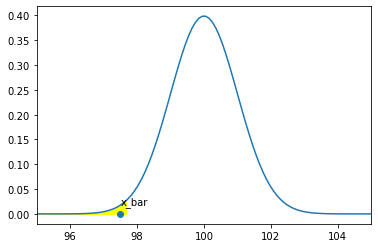

In [54]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min4 = 95
x_max4 = 105


# Defining the sampling distribution mean and sampling distribution std
mean4 = pop_mean4
std4 = pop_std4 / (sample_size4**0.5)

# Ploting the graph and setting the x limits
x4 = np.linspace(x_min4, x_max4, 100)
y4 = norm.pdf(x4, mean4, std4)

plt.xlim(x_min4, x_max4)


plt.plot(x4, y4)

# Computing the left critical values (Tonetailed Test)
z_critical_left4 = pop_mean4 + (-z_critical4 * std4)

# Shading the left rejection region
x14 = np.linspace(x_min4, z_critical_left4, 100)
y14 = norm.pdf(x14, mean4, std4)
plt.fill_between(x14, y14, color='yellow')

# Ploting the sample mean and concluding the results
plt.scatter(sample_mean4, 0)
plt.annotate("x_bar", (sample_mean4, 0.02))



- **In this case sample mean falls in the rejection region**

- **i.e. Reject Null Hypothesis**

In [55]:
if(np.abs(z4) < -z_critical4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [56]:
p_value4 = 1.0 - norm.cdf(np.abs(z4))

print("p_value = ", p_value4)

if(p_value4 < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis


#### Unknown variance of population:

In [57]:
sample_size4=100
sample_mean4=97.5
sample_std4=7
pop_mean4=100

In [58]:
#left One tail (calculating t-critical)
from scipy.stats import t
alpha41 = 1 - 0.95

t_critical4= t.ppf(1-alpha41, df = 99)

print(t_critical4)

1.6603911559963895


In [59]:
# Calculating the t-score

t4= t_score(sample_size4, sample_mean4, pop_mean4, sample_std4)

print(t4)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

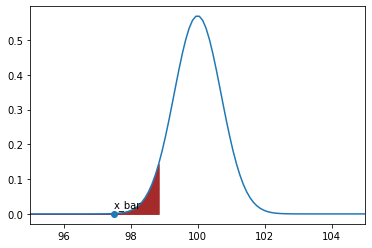

In [60]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min4 = 95
x_max4 = 105


# Defining the sampling distribution mean and sampling distribution std
mean41 = pop_mean4
std41 = sample_std4 / (sample_size4**0.5)

# Ploting the graph and setting the x limits
x41 = np.linspace(x_min4, x_max4, 100)
y41 = norm.pdf(x41, mean41, std41)

plt.xlim(x_min4, x_max4)
plt.plot(x41, y41)

# Computing the left  critical values (One tailed Test)
t_critical_left4 = pop_mean4 + (-t_critical4 * std41)

# Shading the left rejection region
x141 = np.linspace(x_min4, t_critical_left4, 100)
y141 = norm.pdf(x141, mean41, std41)
plt.fill_between(x141, y141, color='brown')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean4, 0)
plt.annotate("x_bar", (sample_mean4, 0.02))

- **In this case sample mean falls in the rejection region**

- **i.e. Reject Null Hypothesis**

In [61]:
# Conclusion using t-test
if(np.abs(t4) > -t_critical4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [62]:
p_value41 = 1.0 - norm.cdf(np.abs(t4))

print("p_value = ", p_value41)

if(p_value41 < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis
